In [48]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import statistics as stat
import math
from scipy.stats import multivariate_normal
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.model_selection import train_test_split
model=GaussianNB()

In [49]:
# Parametre pour le groupe 0 (G0)
N0=50 # nombre des points dans le groupe 0
mu0=[2, 2] # moyenne pour le groupe 0
sigma0=[[1, 0],[0,1]] # matrice de covarience pour le groupe 0

In [50]:
# Parametre pour le groupe 1(G1)
N1=150 # nombre des points dans le groupe 1
mu1=[0, 0] # moyenne pour le groupe 1
sigma1=[[1, 0],[0,2]] # matrice de covarience pour le groupe 1


In [51]:
#génération de points du groupe 0 et du  groupe 1
X0 =multivariate_normal(mu0,sigma0,).rvs(N0) # points pour le groupe 0
X1 =multivariate_normal(mu1,sigma1,).rvs(N1) # points pour le groupe 1

In [52]:
#Génération de label correspondants
Y0=np.zeros(N0)# labele 0 pour le groupe G0
Y1=np.ones(N1) # labele 1 pour le groupe  G1


In [53]:
# Fusion des deux groupe
X=np.vstack((X0,X1)) # combinaison des  points des G0 et G1
Y=np.hstack((Y0,Y1)) # combinaison des  labele des G0 et G1


In [54]:
Y=Y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=50)


In [55]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.005,probability=True),
    SVC(gamma=2, C=0.005,probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=7, n_estimators=14, max_features=1),
    MLPClassifier(alpha=1, max_iter=10000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [56]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=False)

print("="*30)

c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chouh\AppData\Local\Temp\ipykernel_11552\1779438619.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=False)
c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\

KNeighborsClassifier
****Results****
Accuracy: 87.5000%
Log Loss: 1.0312258190001482
SVC
****Results****
Accuracy: 85.0000%
Log Loss: 0.10922866400189886
SVC
****Results****
Accuracy: 80.0000%
Log Loss: 0.1671160443066965
GaussianProcessClassifier
****Results****
Accuracy: 97.5000%
Log Loss: 0.09753294325893289
DecisionTreeClassifier
****Results****
Accuracy: 90.0000%
Log Loss: 3.604365338911715
RandomForestClassifier
****Results****
Accuracy: 95.0000%
Log Loss: 0.16659599062049837
MLPClassifier
****Results****
Accuracy: 97.5000%
Log Loss: 0.10871403556617924
AdaBoostClassifier
****Results****
Accuracy: 92.5000%
Log Loss: 0.4817204373548371
GaussianNB
****Results****
Accuracy: 97.5000%
Log Loss: 0.10746930392629239
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 97.5000%
Log Loss: 0.09236995735676826


c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chouh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

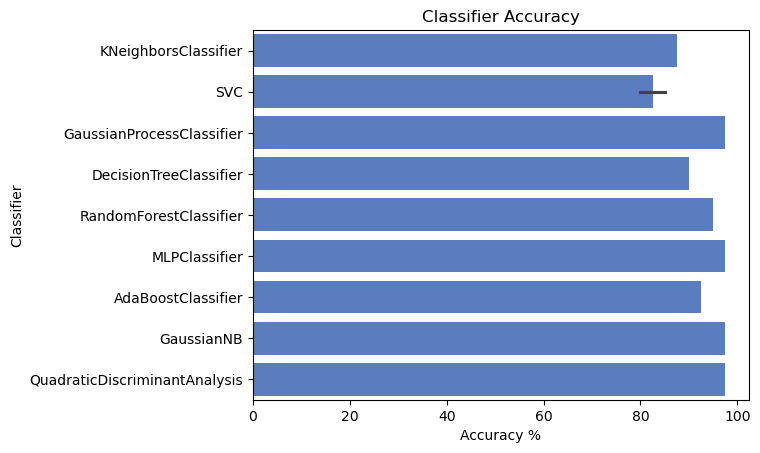

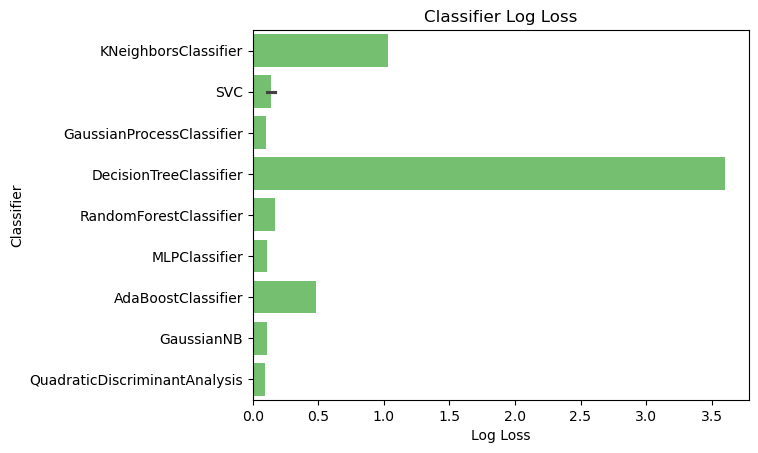

In [57]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()